<a href="https://colab.research.google.com/github/kritika-gupta/IE406-machine-learning/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sympy import Symbol, symbols, Matrix

#### Find minima of following functions using Gradient Descent method with learning rate 0.01 and 0.1 and different number of iterations. Try choosing a large value of learning rate and test the convergence. For $L_5(\theta)$,  use the data file.

In [ ]:
def find_minima(dY):
    theta = np.random.random()
    threshold = 0.000001
    alpha = 0.01
    iteration = 0
    while(True):
        theta_ = theta - alpha*dY(theta)
        if(abs(theta_ - theta) < threshold):
            break
        theta = theta_
        iteration += 1
    return theta, iteration

In [ ]:
def find_minima_two(dY1, dY2):
    def dY(theta):
        return np.array([dY1(theta[0]), dY2(theta[1])])
    theta = np.random.random((2, 1))
    threshold = 0.000001
    alpha = 0.01
    iteration = 0
    while(True):
        theta_ = theta - alpha*dY(theta)
        if(np.linalg.norm(theta_ - theta) < threshold):
            break
        theta = theta_
        iteration += 1
    return theta, iteration   

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    samples, features = X.shape
    plt.figure()    
    theta = np.random.rand(features, 1)
    for i in range(iterations):
        
        theta = theta + (1/samples)*alpha*(np.matmul(X.T, (Y - np.matmul(X, theta))))
        cost = (0.5)*np.sum((Y - np.matmul(X, theta))**2)
        plt.scatter(i, cost, s = 1, c = 'k')
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title(r"Gradient Descent, $\alpha = %.3f$"%alpha)
    plt.show()
    return theta        

In [ ]:
def stochastic_gradient_descent(X, Y, alpha, iterations):
    samples, features = X.shape
    plt.figure()    
    theta = np.random.rand(features, 1)
    for i in range(iterations):
        idx = np.random.randint(0, X_.shape[0])
        x = X_[idx:idx+1, :]
        y = Y[idx:idx+1, :]
#         print(x.shape, theta.shape, y.shape, x.T.shape)
        theta = theta + (1/samples)*alpha*(np.matmul(x.T, (y - np.matmul(x, theta))))
        cost = (0.5)*np.sum((Y - np.matmul(X, theta))**2)
        plt.scatter(i, cost, s = 1, c = 'k')
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title(r"Stochastic Gradient Descent, $\alpha = %.3f$"%alpha)
    plt.show()
    return theta        

### Q1 (a) 
$L_1(\theta) =\theta^2$


In [ ]:
dL = lambda x : 2*x
theta_min, iteration = find_minima(dL)
print("Minima = ", theta_min**2, "\noccurs at theta = ", theta_min)
print("Iterations = ", iteration)

Minima =  2.4602499192884924e-09 
occurs at theta =  4.960090643615792e-05
Iterations =  258


### Q1 (b)
$L_2(\theta) =\theta_1^2  + \theta_2^2$


In [ ]:
dL = lambda x : 2*x
theta_min, iteration = find_minima_two(dL, dL)
print("Minima = ", theta_min[0]**2 + theta_min[1]**2, "\noccurs at theta = ", theta_min)
print("Iterations = ", iteration)

Minima =  [2.40907917e-09] 
occurs at theta =  [[4.89469845e-05]
 [3.64305845e-06]]
Iterations =  408


### Q1 (c)
$L_3(\theta) = (\theta-1)^2$


In [ ]:
L = lambda theta : (theta-1)**2
dL = lambda x : 2*(x-1)
theta_min, iteration = find_minima(dL)
print("Minima = ", L(theta_min), "\noccurs at theta = ", theta_min)
print("Iterations = ", iteration)

Minima =  2.4850378095531573e-09 
occurs at theta =  0.999950149846444
Iterations =  486


### Q1 (d)
$L_4(\theta) = 2(\theta_1-1)^2 + 2(\theta_2-1)^2$

In [ ]:
L = lambda theta1, theta2 : 2*(theta1-1)**2 + 2*(theta2-1)**2
dL = lambda x : 4*(x-1)
theta_min, iteration = find_minima_two(dL, dL)
print("Minima = ", L(theta_min[0], theta_min[1]), "\noccurs at theta = ", theta_min)
print("Iterations = ", iteration)

Minima =  [1.16684758e-09] 
occurs at theta =  [[0.99997617]
 [0.99999605]]
Iterations =  252


### Q1 (e)
$L_5(\theta) = \sum_{i=1}^m(y^{(i)}– (\theta_0+ \theta_1x^{(i)}))^2$

In [ ]:
X, Y = [], []
with open ("data_q3.csv") as data_file:
    data = csv.reader(data_file)
    for row in data:
        X.append(row[0])
        Y.append(row[1])
X = np.array(X, dtype = 'float64')
X = X.reshape((X.shape[0], 1))
Y = np.array(Y, dtype = 'float64')
Y = Y.reshape((Y.shape[0], 1))        
X_scaled = (X - np.mean(X))/(np.std(X))
X_ = np.concatenate((np.ones((X_scaled.shape[0], 1)), X_scaled), axis=1)
print(X_.shape)

(94, 2)


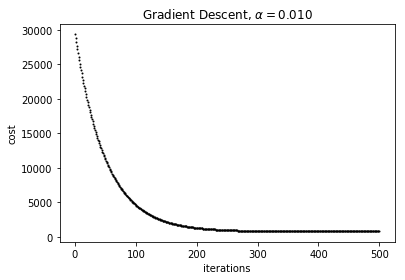

Weights learned =  [[23.5624714 ]
 [-6.81639024]]


In [ ]:
weights = gradient_descent(X_, Y, 0.01, 500)
print("Weights learned = ", weights)

### Q2 Stochastic GD
Find minimum of the function $L(\theta) = \sum_{i=1}^m(y^{(i)}– (\theta_0+ \theta_1x^{(i)}))^2$ using Stochastic Gradient Descent method (Take the data from the data file).     Choose different learning rates and  number of iterations. 


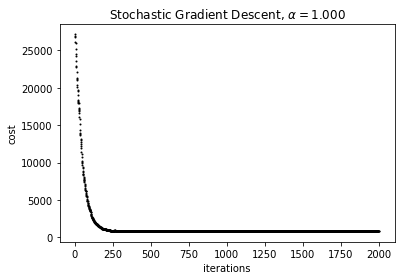

Weights learned =  [[23.82693107]
 [-7.26325567]]


In [ ]:
weights = stochastic_gradient_descent(X_, Y, 1, 2000)
print("Weights learned = ", weights)

### Q3 Steepest Descent
Find the minima of following functions using Steepest Descent method.


In [ ]:
def steepest_descent(func, dfunc):
    old_theta = np.random.random()
    threshold = 0.000001
    old_alpha = 0.01
    alpha = Symbol('alpha')
    L = func.subs(theta, old_theta - alpha*dfunc.subs(theta, old_theta))
    dL1 = L.diff(alpha)
    dL2 = dL1.diff(alpha)
    iteration = 0
    while(True):
        new_alpha = old_alpha - dL1.subs(alpha, old_alpha)/dL2.subs(alpha, old_alpha)
        new_theta = old_theta - new_alpha*dfunc.subs(theta, old_theta)
        if(abs(new_theta - old_theta) < threshold):
            break
        old_theta = new_theta
        old_alpha = new_alpha
        iteration += 1
    return old_theta, iteration

In [ ]:
def steepest_descent2(func, dfunc):
    old_theta1 = np.random.random()
    old_theta2 = np.random.random()
    threshold = 0.000001
    old_alpha = 0.1
    alpha = Symbol('alpha')
    L = func.subs({theta1 : old_theta1 - alpha*dfunc[0].subs(theta1, old_theta1), \
                   theta2 : old_theta2 - alpha*dfunc[1].subs(theta2, old_theta2)})
    dL1 = L.diff(alpha)
    dL2 = dL1.diff(alpha)
    iteration = 0 
    while(True):
        new_alpha = old_alpha - dL1.subs(alpha, old_alpha)/dL2.subs(alpha, old_alpha)
        new_theta1 = old_theta1 - new_alpha*dfunc[0].subs(theta1, old_theta1)
        new_theta2 = old_theta2 - new_alpha*dfunc[1].subs(theta2, old_theta2)

        if(((new_theta1 - old_theta1)**2 + (new_theta2 - old_theta2)**2) < threshold):
            break
        old_theta1 = new_theta1
        old_theta2 = new_theta2
        old_alpha = new_alpha
        iteration += 1
    return old_theta1, old_theta2, iteration

In [ ]:
def steepest_gradient_descent(X, Y, old_alpha, iterations):
    samples, features = X.shape
    old_theta = np.random.rand(features, 1)
    plt.figure()    
    theta = theta = Matrix(symbols(['theta%0.f '%i for i in range(0,features)]))
    alpha = Symbol('alpha')
    J = (0.5)*np.sum((Y - (X*theta)).applyfunc(lambda x : x**2))
    temp = J.diff(theta).subs([(theta[i], old_theta[i]) for i in range(features)])
    subs_list = [(theta[i], (old_theta[i] - (alpha*(temp))[i])[0]) for i in range(features)]
    L = J.subs(subs_list)
    dL1 = L.diff(alpha)
    dL2 = dL1.diff(alpha)
    
    for i in range(iterations):
        new_alpha = old_alpha - dL1.subs(alpha, old_alpha)/dL2.subs(alpha, old_alpha)
        new_theta = np.array(old_theta + (1/samples)*(new_alpha)*(X.T@(Y - (X@old_theta))), dtype = np.float)
        cost = (0.5)*np.sum((Y - (X@new_theta))**2)
        plt.scatter(i, cost, s = 1, c = 'k')
        old_theta = new_theta
        old_alpha = new_alpha
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("Steepest Gradient Descent")
    plt.show()
    return new_theta        

### Q3 (a)
$L_1(\theta) =\theta^2$


In [ ]:
theta = Symbol('theta')
L = theta**2
dL = L.diff(theta)
result_theta,iteration = steepest_descent(L, dL)
print("Minima = ", L.subs(theta, result_theta), " occurs at theta = ", result_theta)
print("Iterations = ", iteration)

Minima =  0  occurs at theta =  0
Iterations =  1


### Q3 (b)
$L_2(\theta) =\theta_1^2  + \theta_2^2$


In [ ]:
theta1 = Symbol('theta1')
theta2 = Symbol('theta2')

L = theta1**2 + theta2**2
dL = L.diff(theta1), L.diff(theta2)

result_theta1, result_theta2, iteration = steepest_descent2(L, dL)
print("Minima = ", L.subs({theta1: result_theta1, theta2: result_theta2}),\
      " occurs at theta = ", result_theta1, result_theta2)
print("Iterations = ", iteration)

### Q3 (c)
$L_3(\theta) = (\theta-1)^2$


In [ ]:
theta = Symbol('theta')
L = (theta-1)**2
dL = L.diff(theta)
result_theta, iteration = steepest_descent(L, dL)
print("Minima = ", L.subs(theta, result_theta), " occurs at theta = ", result_theta)
print("Iterations = ", iteration)

### Q3 (d)
$L_4(\theta) = 2(\theta_1-1)^2 + 2(\theta_2-1)^2$

In [ ]:
theta1 = Symbol('theta1')
theta2 = Symbol('theta2')

L = 2*(theta1-1)**2 + 2*(theta2-1)**2
dL = L.diff(theta1), L.diff(theta2)

result_theta1, result_theta2, iteration = steepest_descent2(L, dL)
print("Minima = ", L.subs({theta1: result_theta1, theta2: result_theta2}),\
      " occurs at theta = ", result_theta1, result_theta2)
print("Iterations = ", iteration)

Minima =  0  occurs at theta =  1.00000000000000 1.00000000000000
Iterations =  1


### Q3 (e)
$L_5(\theta) = \sum_{i=1}^m(y^{(i)}– (\theta_0+ \theta_1x^{(i)}))^2$

In [ ]:
X, Y = [], []
with open ("data_q3.csv") as data_file:
    data = csv.reader(data_file)
    for row in data:
        X.append(row[0])
        Y.append(row[1])
X = np.array(X, dtype = 'float64')
X = X.reshape((X.shape[0], 1))
Y = np.array(Y, dtype = 'float64')
Y = Y.reshape((Y.shape[0], 1))        
X_scaled = (X - np.mean(X))/(np.std(X))
X_ = np.concatenate((np.ones((X_scaled.shape[0], 1)), X_scaled), axis=1)
weights = steepest_gradient_descent(X_,Y, 0.1, 300)
print("Weights learned = ", weights)
